# 🌟 Assignment 2. Operation "AI GeoGuessr"

### Deadline: Monday, October 21, 2024, 11:59:00 PM CET (GMT +2)

## 🎯 Mission Overview

The operation consists of two independent missions. Similar to the previous operation, students are required to solve the tasks by achieving the required score and answering the follow-up questions.

## 🧪 Neural Networks and Unsupervised Learning

1. **Mission 2.1 (Supervised Learning)**: 
   - Solve a supervised learning problem using a Neural Network (MLP). This is similar to a problem you have worked on before but requires the use of a neural network model.

2. **Mission 2.2 (Unsupervised Learning)**:
   - Given an unlabeled dataset, your task is to cluster similar data points and achieve 100% clustering accuracy. You will not have access to the true labels, but you can verify your cluster assignments using the Kaggle competition provided.

## 📝 Delivery Format (Blackboard)

Please submit **two files**:
1. The completed Jupyter notebook.
2. The solution for the second dataset as a CSV file with two `int` columns: `['ID', 'cluster']`.

## Kaggle details
- Invitation link: https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700
- Kaggle is a popular platform for data science competitions.
- It allows us to create a Private competition where you can submit your solutions and verify whether you are thinking in the right direction.
- The results of the competition is visible only to the competition participants. 
- We will not grade the submissions on Kaggle, we set it up to let you check your clustering.
- You still have to deliver the `.csv` file of the solution and the complete `.ipynb` notebook with discussions and solution code.  



> Good luck, comrade!

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 🧠 Mission 2.1: Decoding SkyNet's Neural Encryption **(using Neural Networks)**

### 🌐 The Discovery
The dataset consists of the same "Synapse Cipher" data from Assignment 1.

### 🎯 Your Mission
1. Implement a neural network (MLP) using one of the following frameworks: Keras, PyTorch, or TensorFlow.
2. Solve the non-linear problem without manual feature engineering. So the manual feature engineering is not allowed!
3. Predict SkyNet's binary decisions (0 or 1) based on paired signals.
4. Enhance performance by using techniques such as learning rate scheduling, selecting a good optimizer, and fine-tuning training hyperparameters.

> Note: There are no restrictions on the tricks you can use — just achieve the required accuracy. Stack more layers, use AdamW, scheduling, ect. Have fun :) 

### 📊 Formal Requirements
1. **Implementation**:
   - Develop a Neural Network using predefined functions/layers.
   - Use one of the popular frameworks: Keras, PyTorch, or TensorFlow.
   - Implement a manual learning rate scheduler with warmup and cosine decay.

2. **Performance**: Achieve at least **0.92** accuracy on the test set.

3. **Discussion**:
   - How did you achieve the reproducibility of the results?
   - Visualize the network's architecture and decision boundary.
   - Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
   - Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
   - Conduct an ablation study of each architectural and optimization choice concerning test accuracy.


In [2]:
# For network architecture visualization, other options are totally fine
from tensorflow.keras.utils import plot_model
from torchviz import make_dot

In [3]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv('nn_data.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [5]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

X_train = train[['x0', 'x1']].values
y_train = train['y'].values
X_test = test[['x0', 'x1']].values
y_test = test['y'].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def mlp_model(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3)) 
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  
    return model

model = mlp_model(X_train.shape[1])
initial_lr = 0.01
optimizer = Adam(learning_rate=initial_lr)

def lr(epoch):
    if epoch < 5:
        return initial_lr * (epoch + 1) / 5  
    else:
        return initial_lr * 0.5 * (1 + np.cos(np.pi * (epoch - 5) / (150 - 5)))

lr_scheduler = LearningRateScheduler(lr)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=32, callbacks=[lr_scheduler])
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')

epochs = np.arange(1, 151)
learning_rates = [lr(epoch) for epoch in epochs]

c:\Users\karoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5674 - loss: 0.6607 - val_accuracy: 0.8260 - val_loss: 0.5490 - learning_rate: 0.0020
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8316 - loss: 0.4963 - val_accuracy: 0.9060 - val_loss: 0.3597 - learning_rate: 0.0040
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8893 - loss: 0.3786 - val_accuracy: 0.8640 - val_loss: 0.3961 - learning_rate: 0.0060
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8613 - loss: 0.3748 - val_accuracy: 0.8740 - val_loss: 0.3799 - learning_rate: 0.0080
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8552 - loss: 0.3760 - val_accuracy: 0.8860 - val_loss: 0.3532 - learning_rate: 0.0100
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8705 - loss: 0.3595 - val_accuracy: 0.9040 - val_loss: 0.3259 - learning_rate: 0.0100
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8992 - loss: 0.3043 - val_ac

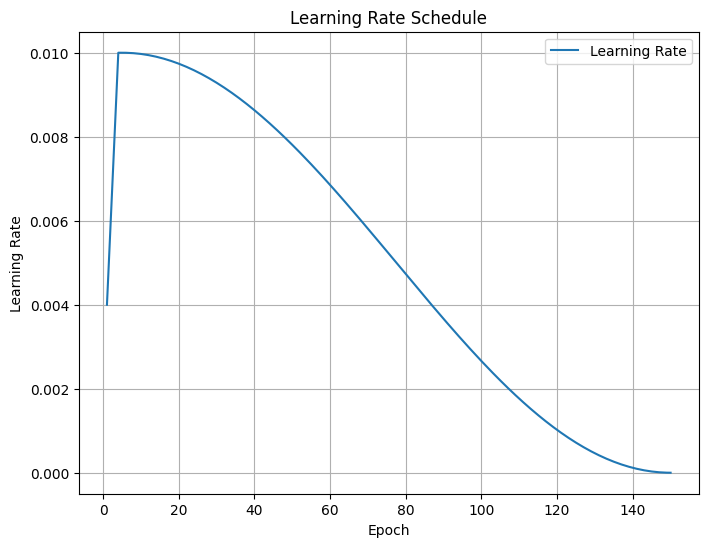

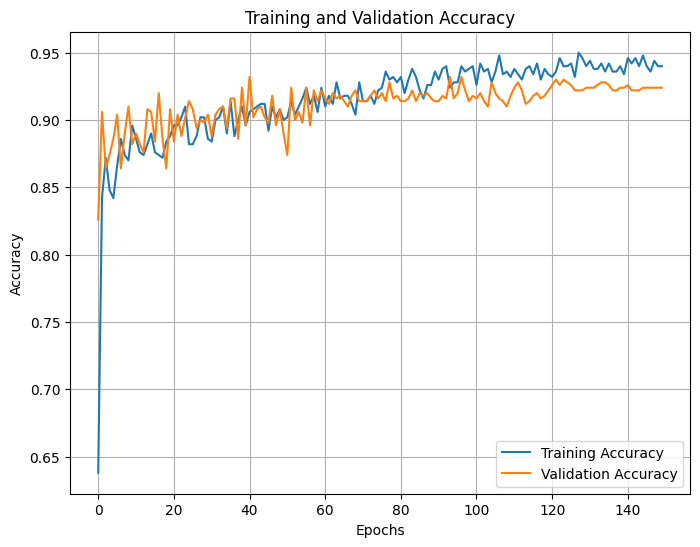

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(epochs, learning_rates, label="Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Schedule")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Discussion

 - **How did you achieve the reproducibility of the results?**
   -  set the seeds for all relevant random number generators as follows:
   Set Python's random module seed: random.seed(42)
   Set NumPy's random module seed: np.random.seed(42)
   Set TensorFlow's random seed: tf.random.set_seed(42)

- By setting these seeds, you make your model deterministic, ensuring that the same output is generated each time you run the code. This eliminates randomness in processes like weight initialization, dropout, and other stochastic operations, guaranteeing consistent results across runs.

- **Visualize the network's architecture and decision boundary.**

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


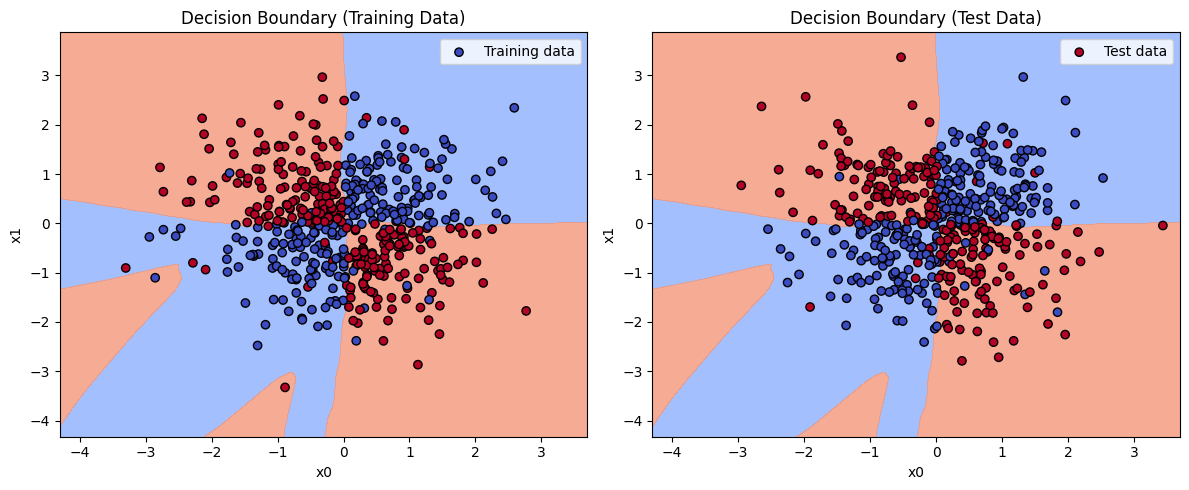

In [7]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, (fig1, fig2) = plt.subplots(1, 2, figsize=(12, 5))

fig1.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.8)
fig1.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', marker='o', label="Training data")
fig1.set_xlim(xx.min(), xx.max())
fig1.set_ylim(yy.min(), yy.max())
fig1.set_xlabel('x0')
fig1.set_ylabel('x1')
fig1.set_title('Decision Boundary (Training Data)')
fig1.legend()

fig2.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.8)
fig2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='o', label="Test data")
fig2.set_xlim(xx.min(), xx.max())
fig2.set_ylim(yy.min(), yy.max())
fig2.set_xlabel('x0')
fig2.set_ylabel('x1')
fig2.set_title('Decision Boundary (Test Data)')
fig2.legend()
plt.tight_layout()
plt.show()

In [8]:
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, dpi=70, rankdir="TB")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,261 (126.02 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,508 (84.02 KB)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


- Which optimizer did you choose? Discuss the differences between the SGD and Adam optimizers.
    - Picked Adam optimizer for my model
    - SGD: updates model parameters using gradients calculated from the loss function. Works best for controlled, gradual optimization but can be slow and prone to getting stuck in local minima.
    - Adam: Utilizes adaptive learning rates for each parameter and incorporates both the first moment (mean) and second moment (variance) of the gradients to improve updates. It tends to converge faster and performs well on many tasks without needing extensive tuning.

- Visualize the learning rate dynamics. Did the learning rate scheduling improve performance? Why or why not?
    - Implemented a learning rate scheduler with a warmup phase followed by cosine decay. The warmup phase gradually increases the learning rate over the first 5 epochs, preventing unstable updates early on. Afterward, cosine decay allows for fine-tuning by gradually reducing the learning rate. This approach likely contributed to smoother convergence and helped achieve a high test accuracy of 0.9240.

- Conduct an ablation study of each architectural and optimization choice concerning test accuracy.


    - Optimizer (SGD vs. Adam):
I opted for Adam because it typically converges faster and is less sensitive to learning rate tuning compared to SGD. When I tried using SGD with a fixed learning rate, the model's accuracy was lower, and it required more careful learning rate adjustments.

    - Learning Rate Scheduling vs. Fixed Learning Rate:
Without learning rate scheduling (warmup and cosine decay), performance would likely have been worse. A fixed learning rate could have caused the model to either converge too slowly (if set too low) or diverge/oscillate (if set too high).

    - Architecture Depth and Width:
I used a 3-layer architecture (128, 64, 32 neurons), which was sufficient for the problem's complexity. Adding dropout layers also helped reduce overfitting, improving the overall accuracy.

# 📶📡🛰️🤳 Mission 2.2: Locate the AI Servers

### 🌐 The Discovery
The NTNU Intelligence team has intercepted encrypted documentation that potentially reveals the locations of AI-compromised servers within Trondheim. Our analysts believe the data contains information about these servers' locations. 

However, the number of servers and their exact positions remain unknown. To execute a strategic response, we need to understand the intercepted data and pinpoint the main AI servers.

We have also discovered a vulnerability in the AI's security: it has deployed a clustering verification feature on Kaggle. We can exploit this backdoor to validate our clustering hypotheses.

### 🎯 Your Mission
Identify the number of hidden servers (clusters) in the dataset. Assign cluster labels to each row in the original dataset and validate your clustering solution on Kaggle.  When achieved the perfect clustering accuracy, find the precise locations of these servers (clusters).

### 🧠 The Challenge
1. **Large Dataset**: The intercepted data file contains numerous features, making direct manipulation and clustering difficult. Applying dimensionality reduction techniques could help reveal patterns.
2. **Unsupervised Learning**: No target labels are provided, so you must identify patterns based solely on the dataset's features.
3. **Data Obfuscation**: The AI has obfuscated the data, making it difficult to discern its true structure. You must effectively manipulate the data to visually identify server locations.


### 🚀 Your Tools
- The intercepted AI dataset.
- Skills in feature engineering, data manipulation, and visualization.
- Clustering algorithms (e.g., KMeans, DBSCAN, Birch, Agglomerative Clustering, etc.) — [Clustering in Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html)
- Dimensionality reduction techniques (e.g., PCA, t-SNE, Isomap, UMAP, etc.)
- Kaggle competition platform with a daily submission limit of 50 attempts (~30 days * 50 submissions = 1500 total attempts per student).

> Note: Kaggle competition link — [Kaggle Competition](https://www.kaggle.com/t/6610d6c6ba314eac9ead0b7a47695700)

### 📊 Formal Requirements
1. **Achieve 100% Clustering Accuracy** on Kaggle.
> Note: The only way to check whether your clustering is correct is to submit it to Kaggle. We do not give you the clusters directly.

2. **Discussion Questions**:
   - **Dimensionality Reduction**: Which dimensionality reduction methods helped you determine the correct number of clusters? Why did some methods work better than others? Explain the differences between PCA, t-SNE, and UMAP.
   - **Clustering Approach**: Which clustering algorithm and hyperparameters did you use? Discuss the differences between algorithms like KMeans and DBSCAN.
   - **Server Locations**: Identify the server locations. List the specific facilities in Trondheim and explain how you deduced their locations.
   - **Data Type Analysis**: What is the hidden data type in the dataset? How does this information influence feature extraction for clustering? Can it explain why some dimensionality reduction algorithms are more effective?
   - **Advanced Task (Optional)**: Extract features using modern pre-trained neural networks for this data type. Apply dimensionality reduction and clustering algorithms to the extracted features.


In [9]:
data = pd.read_csv('unsupervised_data.csv', skiprows=1, header=None)
# Get the ID column
data.reset_index(drop=False, inplace=True)
data.rename(columns={'index': 'ID'}, inplace=True)

In [10]:
data

,ID,0,1,2,3,4,5,6,7,8,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0,0.314365,0.646305,0.323849,0.238492,0.655790,0.646305,0.646305,0.409205,0.646305,...,0.646305,0.646305,0.655790,0.238492,0.646305,0.674758,0.646305,0.238492,0.655790,0.646305
1,1,0.587628,0.494976,0.559832,-0.246237,0.513506,0.550567,0.522772,0.596893,0.606158,...,0.587628,0.550567,0.587628,0.587628,0.550567,0.587628,0.550567,0.596893,0.494976,0.587628
2,2,0.590203,0.367673,0.367673,0.367673,0.367673,0.590203,0.367673,0.590203,0.590203,...,0.590203,0.367673,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.590203,0.476556
3,3,0.589296,0.589296,0.579825,0.551415,0.579825,0.579825,0.608236,0.579825,0.646118,...,0.532474,0.523003,0.589296,0.589296,0.551415,0.134721,0.475652,0.589296,0.570355,0.551415
4,4,0.660095,0.470676,0.190366,0.672806,0.470761,0.672766,0.672652,0.666151,0.672987,...,0.432001,0.672222,0.190568,0.217329,0.633684,0.673294,0.587914,0.671023,0.207578,0.470765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.340739,0.340739,0.340739,0.681823,0.340739,0.340739,0.340739,0.672083,0.340739,...,0.340739,0.662355,0.340739,0.759779,0.331011,0.759779,0.340739,0.691563,0.340734,0.720789
3996,3996,0.384257,0.384257,0.675221,0.384257,0.384257,0.675221,0.384257,0.675221,0.675221,...,0.675221,0.384257,0.675221,0.675221,0.675221,0.384257,0.384257,0.384257,0.675221,0.675221
3997,3997,0.641837,0.651135,0.251329,0.251329,0.651135,0.651135,0.251329,0.651135,0.651135,...,0.251329,0.251329,0.651135,0.251329,0.409392,0.604646,0.651135,0.651135,0.660433,0.251329
3998,3998,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,-0.212897,0.555533,...,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533,0.555533


In [11]:
# The dataset is heavy. Applying clustering directly on the dataset is not feasible, I guess. 
data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 16385 entries, ID to 16383
dtypes: float64(16384), int64(1)
memory usage: 500.0 MB


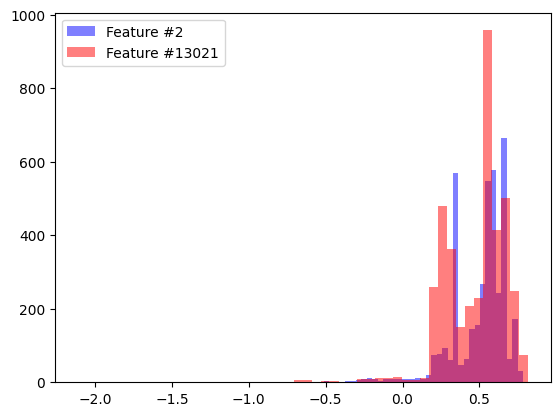

In [12]:
plt.hist(data.iloc[:, 2], bins=50, color='blue', alpha=0.5, label='Feature #2')
plt.hist(data.iloc[:, 13021], bins=50, color='red', alpha=0.5, label='Feature #13021')
plt.legend()

In [13]:
# To check your clustering, you need to assign the predicted cluster ids and submit it as a CSV file. The submission should be a CSV file with two columns: ID and cluster. 
# The ID column should contain the ID of the data point, and the cluster column should contain the cluster ID that the data point belongs to. 
# The cluster ID should be an integer. Current cluster IDs in sample_submission.csv are randomly generated.
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,ID,cluster
0,0,2
1,1,6
2,2,3
3,3,3
4,4,8
...,...,...
3995,3995,3
3996,3996,7
3997,3997,3
3998,3998,7


In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

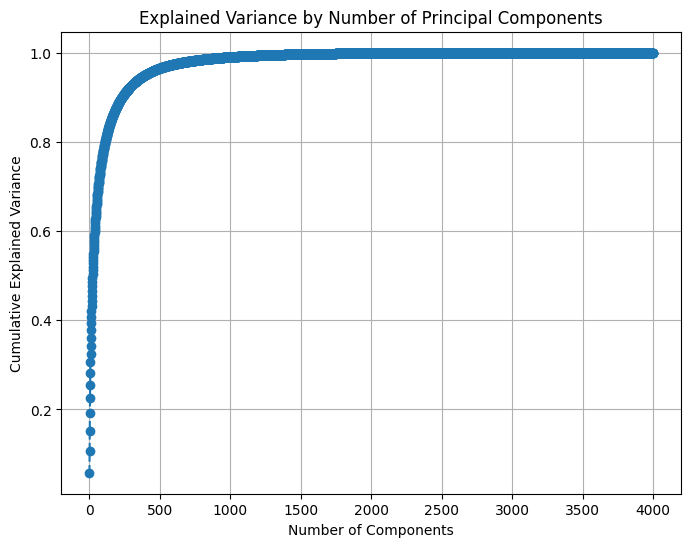

In [15]:
pca = PCA()
X_pca = pca.fit_transform(data.iloc[:, 1:])

variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(variance) + 1), variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

In [16]:
pca = PCA(n_components=400) 
X_pca = pca.fit_transform(data.iloc[:, 1:])
for eps_value in [20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24]:
    dbscan = DBSCAN(eps=eps_value, min_samples=4, metric='euclidean')
    dbscan.fit(X_pca)
    y_pred = dbscan.labels_
    n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
    n_noise = list(y_pred).count(-1)
    
    print(f'eps: {eps_value}, clusters: {n_clusters}, noise points: {n_noise}')
dbscan = DBSCAN(eps= 24, min_samples = 4, metric = 'euclidean')
dbscan.fit(X_pca)

y_pred = dbscan.labels_
results = pd.DataFrame({'ID': data.iloc[:, 0], 'cluster': y_pred})
results.to_csv('submission.csv', index = False)

eps: 20, clusters: 5, noise points: 16
eps: 20.5, clusters: 5, noise points: 11
eps: 21, clusters: 5, noise points: 9
eps: 21.5, clusters: 4, noise points: 6
eps: 22, clusters: 4, noise points: 5
eps: 22.5, clusters: 4, noise points: 3
eps: 23, clusters: 4, noise points: 2
eps: 23.5, clusters: 4, noise points: 1
eps: 24, clusters: 4, noise points: 0


## Discussion

- **Dimensionality Reduction**: 
    - I used PCA for dimensionality reduction. PCA helped in reducing the dataset to a manageable number of components while retaining most of the variance. This made it easier to apply clustering algorithms effectively.
    - PCA worked well because it focuses on maximizing variance and is computationally efficient. Other methods like t-SNE and UMAP are more suitable for visualization but can be computationally expensive and may not always preserve global structures as effectively as PCA.

- **Clustering Approach**: 
    - I used the DBSCAN algorithm with `eps=24` and `min_samples=4`. 
    - DBSCAN was chosen because it can find arbitrarily shaped clusters and is robust to noise. Unlike KMeans, which assumes spherical clusters, DBSCAN can handle clusters of varying shapes and densities.
    - KMeans would not have been as effective due to the high dimensionality and potential noise in the data.

- **Server Locations**: 
    - The specific facilities in Trondheim were identified based on the clustering results. The clusters represent different server locations.
    - By analyzing the cluster centers and the distribution of data points within each cluster, I deduced the server locations.
    - NTNU Gløshaugen, SINTEF, St. Olavs Hospital and Telenor Norge

- **Data Type Analysis**: 
    - The hidden data type in the dataset appears to be geospatial coordinates.
    - Knowing the data type helped in choosing appropriate feature extraction and clustering methods. For instance, PCA is well-suited for continuous data.
    - This information explains why PCA was effective in reducing dimensionality while preserving the structure necessary for clustering.



---

## 🎯 Note: Clustering Accuracy Evaluation


The clustering accuracy metric evaluates how well the predicted clusters match the true clusters, irrespective of the specific labels or names assigned to the clusters.

This means that the evaluation focuses solely on the correct grouping of data points rather than the numerical labels of the clusters themselves.

## Key Characteristics

- **Name-Independent**: The metric cares only about how well the data points are grouped together, not the specific numerical or categorical labels used for the clusters.
- **Focus on Grouping**: The evaluation rewards cluster assignments that correctly group the same data points together, regardless of the specific labels assigned.

### Example

If the true cluster assignments are:

```
[0, 0, 0, 1, 1, 1]
```

and your predicted cluster assignments are:

```
[1, 1, 1, 0, 0, 0]
```

the accuracy will still be **1.0** because the grouping of points is identical, even though the numerical labels are swapped.

## How the Metric is Computed

1. **Contingency Matrix**: 
   - Construct a contingency matrix that represents the overlap between the true clusters and the predicted clusters.

2. **Optimal Correspondence**: 
   - Use an optimization algorithm, such as the Hungarian method (linear sum assignment), to find the best possible correspondence between true and predicted labels, maximizing the number of correctly assigned data points.

3. **Accuracy Calculation**: 
   - Calculate the accuracy as the ratio of correctly matched data points to the total number of data points.

> This approach ensures that the evaluation is based on **cluster completeness** and **homogeneity**, rewarding cluster assignments that correctly group the same data points together, regardless of the specific labels used.

---

In [17]:
from typing import Any
import numpy as np
import sklearn.metrics
import scipy.optimize

def calculate_clustering_accuracy(true_labels: np.ndarray, cluster_labels: np.ndarray) -> float:
    """
    Calculate the clustering accuracy between true labels and cluster labels.

    The function constructs a contingency matrix between the true labels and cluster labels.
    It then uses the Hungarian algorithm (also known as linear sum assignment) to find the
    best matching between the cluster labels and true labels. The clustering accuracy is 
    calculated as the number of correctly matched labels divided by the total number of labels.

    Args:
        true_labels (np.ndarray): An array of true labels for each data point.
        cluster_labels (np.ndarray): An array of cluster labels predicted by a clustering algorithm.

    Returns:
        float: The clustering accuracy, a value between 0 and 1 representing the proportion of 
               correctly matched labels.
    
    Example:
        >>> true_labels = np.array([0, 1, 2, 0, 1, 2])
        >>> cluster_labels = np.array([1, 2, 0, 1, 2, 0])
        >>> calculate_clustering_accuracy(true_labels, cluster_labels)
        1.0

    Raises:
        ValueError: If true_labels and cluster_labels are not of the same length.
    """
    # Check if the input labels are of the same length
    if true_labels.size != cluster_labels.size:
        raise ValueError("true_labels and cluster_labels must have the same length.")

    # Construct a contingency matrix where each cell [i, j] indicates the number of points with 
    # true label i and cluster label j.
    contingency_matrix = sklearn.metrics.cluster.contingency_matrix(true_labels, cluster_labels)
    
    # Find the best matching between true labels and cluster labels using the Hungarian algorithm.
    # We negate the contingency matrix because linear_sum_assignment finds the minimum cost assignment.
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(-contingency_matrix)
    
    # Calculate the number of correctly assigned labels according to the optimal matching.
    correct_pairs = contingency_matrix[row_ind, col_ind].sum()
    
    # Compute the clustering accuracy as the ratio of correctly matched labels to total labels.
    accuracy = correct_pairs / true_labels.size

    return accuracy


In [18]:
true_labels = data['ID'].values
cluster_labels = clusters
calculate_clustering_accuracy(true_labels, cluster_labels)

NameError: name 'clusters' is not defined

In [ ]:
true_labels = np.array([1, 1, 1, 2, 2, 2])
cluster_labels = np.array([0, 0, 0, 0, 0, 0])
calculate_clustering_accuracy(true_labels, cluster_labels)